#Funciones desarrolladas

In [1]:
def faltantes (data):
  from tabulate import tabulate
  lista_iterable = (t for t in data.columns)
  lista2 =[]
  for t in lista_iterable:
    faltantes = data[t].isnull().sum()
    lista2 += [[t, faltantes]]
  print(tabulate(lista2, headers = ['Atibuto','Faltantes']))

In [2]:
def valores_unicos(data):
  for col in data:
      print(col)
      print(data[col].unique())
      print('---------------------------------------------------')

In [3]:
def knn_fold(fold):
  accuracy_knn = cross_val_score(estimator=knn, X=X, y=y, cv=fold,  scoring='accuracy')
  promedio_1_acc.append(accuracy_knn.mean())

  precision_knn = cross_val_score(estimator=knn, X=X, y=y, cv=fold,  scoring='precision')
  promedio_1_prec.append(precision_knn.mean())

  f1_knn = cross_val_score(estimator=knn, X=X, y=y, cv=fold,  scoring='f1')
  promedio_1_f1.append(f1_knn.mean())

  recall_knn = cross_val_score(estimator=knn, X=X, y=y, cv=fold,  scoring='recall')
  promedio_1_recall.append(recall_knn.mean())


def arboles_fold(fold):
  accuracy_arboles = cross_val_score(estimator=arboles, X=X, y=y, cv=fold,  scoring='accuracy')
  promedio_2_acc.append(accuracy_arboles.mean())

  precision_arboles = cross_val_score(estimator=arboles, X=X, y=y, cv=fold,  scoring='precision')
  promedio_2_prec.append(precision_arboles.mean())

  f1_arboles = cross_val_score(estimator=arboles, X=X, y=y, cv=fold,  scoring='f1')
  promedio_2_f1.append(f1_arboles.mean())

  recall_arboles = cross_val_score(estimator=arboles, X=X, y=y, cv=fold,  scoring='recall')
  promedio_2_recall.append(recall_arboles.mean())

def randomForest_fold(fold):
  accuracy_randomForest = cross_val_score(estimator=randomForest, X=X, y=y, cv=fold,  scoring='accuracy')
  promedio_3_acc.append(accuracy_randomForest.mean())

  precision_randomForest = cross_val_score(estimator=randomForest, X=X, y=y, cv=fold,  scoring='precision')
  promedio_3_prec.append(precision_randomForest.mean())

  f1_randomForest = cross_val_score(estimator=randomForest, X=X, y=y, cv=fold,  scoring='f1')
  promedio_3_f1.append(f1_randomForest.mean())

  recall_randomForest = cross_val_score(estimator=randomForest, X=X, y=y, cv=fold,  scoring='recall')
  promedio_3_recall.append(recall_randomForest.mean())


#Cargar la base de datos

In [4]:
import pandas as pd
data_original = pd.read_csv("mushrooms.csv")#read data
data_original

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Número de instancias y de atributos

In [5]:
atributos = data_original.shape[1]
instancias = data_original.shape[0]
print('Número de atributos:', atributos)
print('Número de instancias:', instancias)

Número de atributos: 23
Número de instancias: 8124


#Datos faltantes

In [6]:
faltantes(data_original)

Atibuto                     Faltantes
------------------------  -----------
class                               0
cap-shape                           0
cap-surface                         0
cap-color                           0
bruises                             0
odor                                0
gill-attachment                     0
gill-spacing                        0
gill-size                           0
gill-color                          0
stalk-shape                         0
stalk-root                          0
stalk-surface-above-ring            0
stalk-surface-below-ring            0
stalk-color-above-ring              0
stalk-color-below-ring              0
veil-type                           0
veil-color                          0
ring-number                         0
ring-type                           0
spore-print-color                   0
population                          0
habitat                             0


#Valores únicos en todas las columnas

Conteo

In [7]:
data_original.describe(include='all').loc['unique', :]

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
Name: unique, dtype: object

Valores únicos en la base de datos original

In [8]:
valores_unicos(data_original)

class
['p' 'e']
---------------------------------------------------
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
---------------------------------------------------
cap-surface
['s' 'y' 'f' 'g']
---------------------------------------------------
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
---------------------------------------------------
bruises
['t' 'f']
---------------------------------------------------
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
---------------------------------------------------
gill-attachment
['f' 'a']
---------------------------------------------------
gill-spacing
['c' 'w']
---------------------------------------------------
gill-size
['n' 'b']
---------------------------------------------------
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
---------------------------------------------------
stalk-shape
['e' 't']
---------------------------------------------------
stalk-root
['e' 'c' 'b' 'r' '?']
------------------------------------------------

? -> Missing value

#Imputación de las columnas que contengan "?"
Cambiar los valores "?" por valores faltantes 
Volvemos a cargar la base de datos para reemplazar los valores "?" por valores Na

In [9]:
na_values = ["?"]
data_missing = pd.read_csv("mushrooms.csv",
                 na_values = na_values)

In [10]:
faltantes(data_missing)

Atibuto                     Faltantes
------------------------  -----------
class                               0
cap-shape                           0
cap-surface                         0
cap-color                           0
bruises                             0
odor                                0
gill-attachment                     0
gill-spacing                        0
gill-size                           0
gill-color                          0
stalk-shape                         0
stalk-root                       2480
stalk-surface-above-ring            0
stalk-surface-below-ring            0
stalk-color-above-ring              0
stalk-color-below-ring              0
veil-type                           0
veil-color                          0
ring-number                         0
ring-type                           0
spore-print-color                   0
population                          0
habitat                             0


#Imputación por moda

In [11]:
data_imp = data_missing
new_val = data_missing['stalk-root'].mode()[0]
data_imp['stalk-root'].fillna(new_val, inplace=True)
print("Se reemplazan los valores faltantes con la clase: ", new_val)

Se reemplazan los valores faltantes con la clase:  b


In [12]:
faltantes(data_imp)

Atibuto                     Faltantes
------------------------  -----------
class                               0
cap-shape                           0
cap-surface                         0
cap-color                           0
bruises                             0
odor                                0
gill-attachment                     0
gill-spacing                        0
gill-size                           0
gill-color                          0
stalk-shape                         0
stalk-root                          0
stalk-surface-above-ring            0
stalk-surface-below-ring            0
stalk-color-above-ring              0
stalk-color-below-ring              0
veil-type                           0
veil-color                          0
ring-number                         0
ring-type                           0
spore-print-color                   0
population                          0
habitat                             0


#Quitamos la columna que solo contiene 1 clase

In [13]:
data_imp = data_imp.drop(['veil-type'], axis=1)
data_imp

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [14]:
valores_unicos(data_imp)

class
['p' 'e']
---------------------------------------------------
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
---------------------------------------------------
cap-surface
['s' 'y' 'f' 'g']
---------------------------------------------------
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
---------------------------------------------------
bruises
['t' 'f']
---------------------------------------------------
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
---------------------------------------------------
gill-attachment
['f' 'a']
---------------------------------------------------
gill-spacing
['c' 'w']
---------------------------------------------------
gill-size
['n' 'b']
---------------------------------------------------
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
---------------------------------------------------
stalk-shape
['e' 't']
---------------------------------------------------
stalk-root
['e' 'c' 'b' 'r']
---------------------------------------------------


#Ver el balance de las clases

e    4208
p    3916
Name: class, dtype: int64


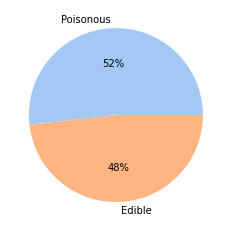

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

classLabelsCounts = data_imp["class"].value_counts()
print(classLabelsCounts)

colors = sns.color_palette('pastel')
plt.figure(figsize=(4, 4))
plt.pie(classLabelsCounts , labels = ["Poisonous", "Edible"], colors = colors, autopct = "%.0f%%")
plt.show()

#Análisis con **U de Theil**

In [16]:
import math
from collections import Counter
import numpy as np
import scipy.stats as ss
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

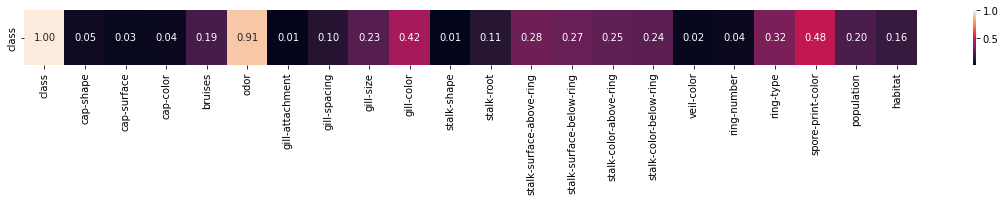

In [17]:
theilu = pd.DataFrame(index=['class'],columns=data_imp.columns)
columns = data_imp.columns
for j in range(0,len(columns)):
    u = theil_u(data_imp['class'].tolist(),data_imp[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

# Análisis con **V de Cramer**

In [18]:
pip install association_metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3954 sha256=4de2fa562b06e5d9f687fd73af516423cdf6edeee448d5520befe55d46e5ce4f
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


In [19]:
# Import association_metrics  
import association_metrics as am
# Convert you str columns to Category columns
df = data_imp.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame
cramersv = am.CramersV(df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.245571,0.196925,0.218427,0.501530,0.971005,0.129200,0.348387,0.540024,0.680830,...,0.587944,0.574837,0.524850,0.514725,0.153421,0.214772,0.603271,0.752645,0.487376,0.440136
cap-shape,0.245571,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,...,0.160055,0.112243,0.214668,0.170397,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124
cap-surface,0.196925,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,...,0.144121,0.169393,0.252472,0.257451,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007
cap-color,0.218427,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,...,0.257079,0.320134,0.276539,0.279258,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779
bruises,0.501530,0.255606,0.134377,0.217648,1.000000,0.660906,0.137359,0.299473,0.369596,0.650326,...,0.575184,0.566732,0.483226,0.492838,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920
odor,0.971005,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,...,0.416352,0.507273,0.450204,0.446679,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058
gill-attachment,0.129200,0.154978,0.210841,0.247965,0.137359,0.261795,1.000000,0.071489,0.108984,0.780160,...,0.094589,0.124696,0.977755,0.977755,0.955097,0.203775,0.250744,0.826898,0.414080,0.436527
gill-spacing,0.348387,0.081702,0.338222,0.399956,0.299473,0.429768,0.071489,1.000000,0.108333,0.325755,...,0.437267,0.414870,0.401152,0.375507,0.098653,0.245659,0.290314,0.308599,0.673949,0.542608
gill-size,0.540024,0.346823,0.277414,0.470307,0.369596,0.760919,0.108984,0.108333,1.000000,0.784064,...,0.170060,0.150917,0.366078,0.347172,0.113972,0.194983,0.570653,0.660680,0.517812,0.499326
gill-color,0.680830,0.235100,0.257618,0.282430,0.650326,0.390260,0.780160,0.325755,0.784064,1.000000,...,0.353863,0.377980,0.420948,0.417087,0.453427,0.444296,0.518523,0.485242,0.424979,0.458522


#Seleccionando los atributos con mayor importancia

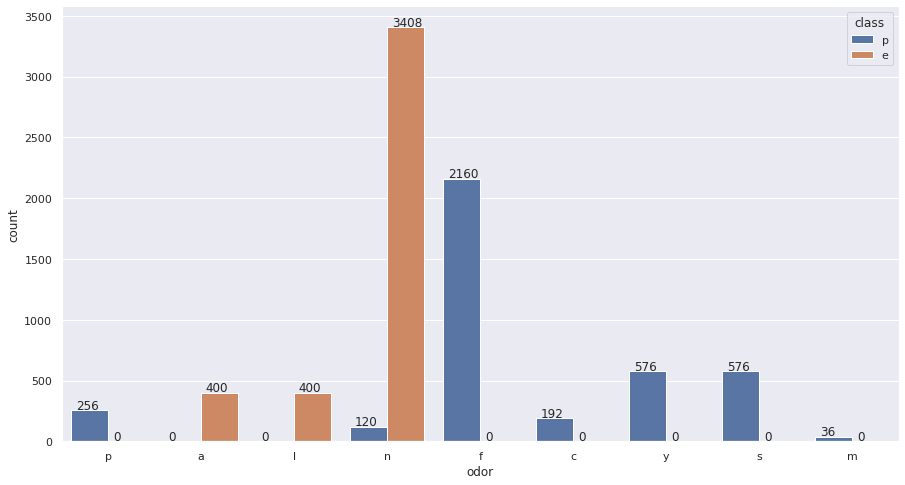

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='odor',hue='class',data=data_imp)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

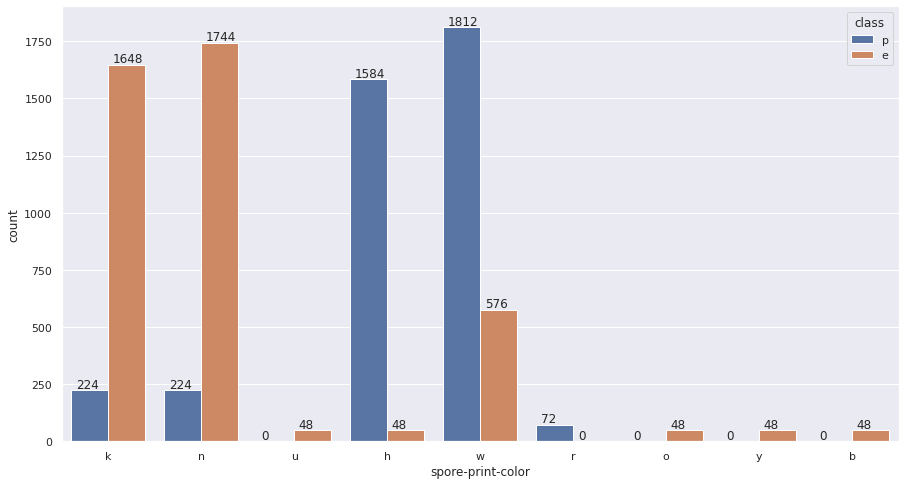

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='spore-print-color',hue='class',data=data_imp)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

#Codificación one hot

Antes de realizar la codificación, se pasará la columna de la clase a 1 y 0

In [22]:
data_imp["class"] = data_imp["class"].map({"p":1,"e":0})
data_imp


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [23]:
data_imp.dtypes

class                        int64
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [24]:
#### Toma todas las características del dataset
#categorical_features = data_imp.select_dtypes(include = ["object", "category"]).columns
#categorical_features

#### Solo toma las características principales con mayor impacto
categorical_feature = data_imp.loc[:, ['odor', 'spore-print-color', 'bruises', 'gill-color', 'gill-size']] 
categorical_features = categorical_feature.select_dtypes(include = ["object", "category"]).columns

In [25]:
categorical_data = pd.get_dummies(data_imp[categorical_features], drop_first = True)
categorical_data.head()

,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,spore-print-color_h,spore-print-color_k,...,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,gill-size_n
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
data_codificado = pd.concat([data_imp['class'], categorical_data], axis = 1)
data_codificado

,class,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,spore-print-color_h,...,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,gill-size_n
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8120,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


#Asignación de variables X y Y

In [27]:
y = data_codificado["class"]
X = data_codificado.drop(["class"], axis=1)

#Dividir los datos para train y para test 80/20

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=101)
print(X_train.shape)
print(X_test.shape)
y

(6499, 29)
(1625, 29)


0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

#Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
random_forest_model = RandomForestClassifier(criterion = 'entropy')
random_forest_model.fit(X_train,y_train)
y_pred_randomForest = random_forest_model.predict(X_test)

#Evaluación del modelo

In [30]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_randomForest)
accuracy  

0.9975384615384615

#Mariz de confusión y reporte de clasificación **Random Forest**

{"p":1,"e":0}

Reporte de clasificación Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      0.99      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión Random Forest:



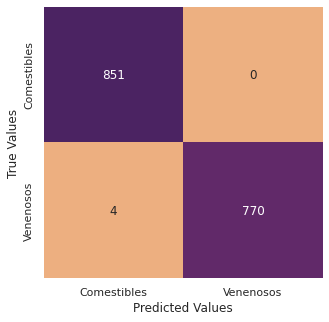

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
matriz_modelo_randomForest = confusion_matrix(y_test,y_pred_randomForest)
reporte_modelo_randomForest = classification_report(y_test,y_pred_randomForest)

print("Reporte de clasificación Random Forest:\n", reporte_modelo_randomForest)

clases = ['Comestibles', 'Venenosos']
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
fig,ax = plt.subplots(figsize = (5,5))

print("Matriz de confusión Random Forest:\n")
ax = sns.heatmap(matriz_modelo_randomForest, annot=True, fmt="d", annot_kws={"size": 12}, cmap="flare", cbar = False) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.xaxis.set_ticklabels(clases)
ax.yaxis.set_ticklabels(clases)
plt.show()

#Arbol de decisión

In [32]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(criterion = 'gini')
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
arbol = modelo.fit(X_train,y_train)
y_pred_tree = arbol.predict(X_test)
print("Test Accurary : ", arbol.score(X_test,y_test))
print("Train Accurary : ", arbol.score(X_train,y_train))

Test Accurary :  0.9975384615384615
Train Accurary :  0.9950761655639329


Reporte de clasificación Árbol de decisión:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      0.99      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión Árbol de decisión:



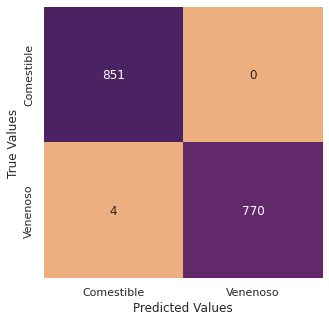

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm_tree = confusion_matrix(y_test,y_pred_tree)
cr_tree = classification_report(y_test,y_pred_tree)

print("Reporte de clasificación Árbol de decisión:\n",cr_tree)

clases = ['Comestible', 'Venenoso']
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
fig,ax = plt.subplots(figsize = (5,5))

print("Matriz de confusión Árbol de decisión:\n")
ax = sns.heatmap(cm_tree, annot=True, fmt="d", annot_kws={"size": 12}, cmap="flare", cbar = False) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.xaxis.set_ticklabels(clases)
ax.yaxis.set_ticklabels(clases)
plt.show()

#K-Nearest Neighbor
Se prueba con distintos valores

In [34]:
#lista de valores para k
from sklearn.neighbors import KNeighborsClassifier

valores_k = list(range(2, 42, 2))
k_accuracies = []

for i in valores_k:
    clasificador_knn = KNeighborsClassifier(n_neighbors=i)  
    clasificador_knn.fit(X_train, y_train)  
    y_pred = clasificador_knn.predict(X_test) 
    accuracies = accuracy_score(y_test, y_pred)
    k_accuracies.append(accuracies)

#Gráfica de accuracy

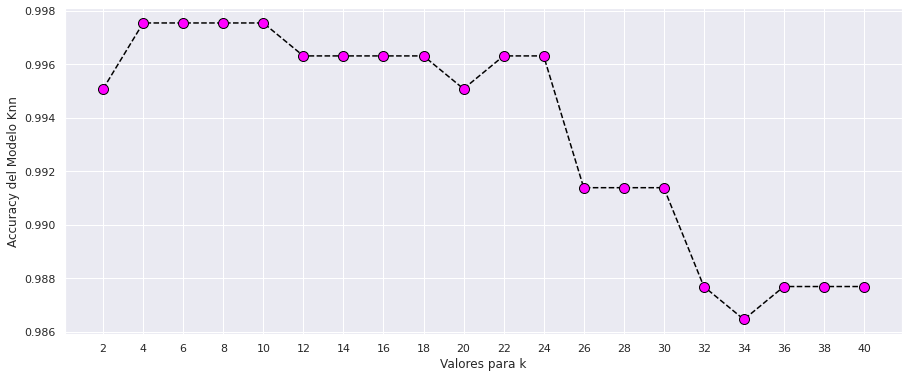

In [35]:
plt.figure(figsize=(15,6))
plt.plot(valores_k, k_accuracies, color='black', linestyle='dashed', 
         marker='o',markerfacecolor='magenta', markersize=10)
plt.xlabel('Valores para k')
plt.ylabel('Accuracy del Modelo Knn')
plt.xticks(valores_k, valores_k)
plt.show()

#Gráfica de error


Minimum error:- 0.0024615384615384616 at K = 3


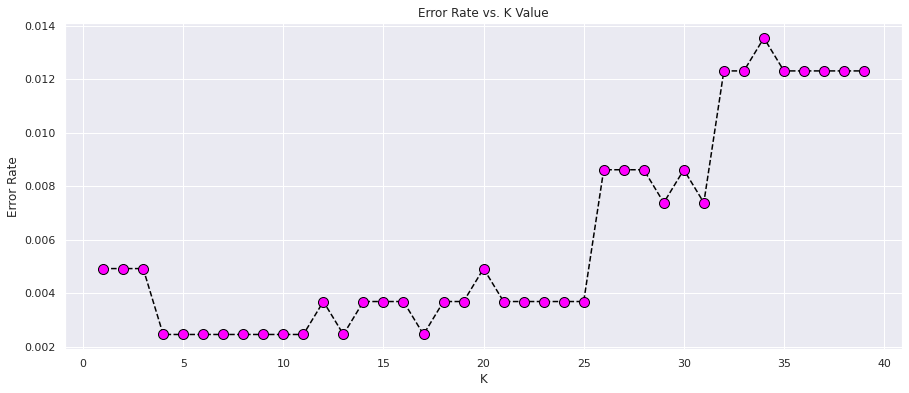

In [36]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', 
         marker='o',markerfacecolor='magenta', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Se elige K = 12, para evitar un sobre-entrenamiento

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
k_optimo = 12
 
knn = KNeighborsClassifier(k_optimo)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 1.00


Reporte de clasificación KNN:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       851
           1       1.00      0.99      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de confusión KNN:



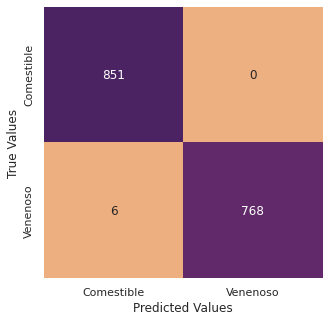

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm_knn = confusion_matrix(y_test,y_pred_knn)
cr_knn = classification_report(y_test,y_pred_knn)

print("Reporte de clasificación KNN:\n",cr_knn)

clases = ['Comestible', 'Venenoso']
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
fig,ax = plt.subplots(figsize = (5,5))

print("Matriz de confusión KNN:\n")
ax = sns.heatmap(cm_knn, annot=True, fmt="d", annot_kws={"size": 12}, cmap="flare", cbar = False) # font size
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
ax.xaxis.set_ticklabels(clases)
ax.yaxis.set_ticklabels(clases)
plt.show()

#Validación cruzada

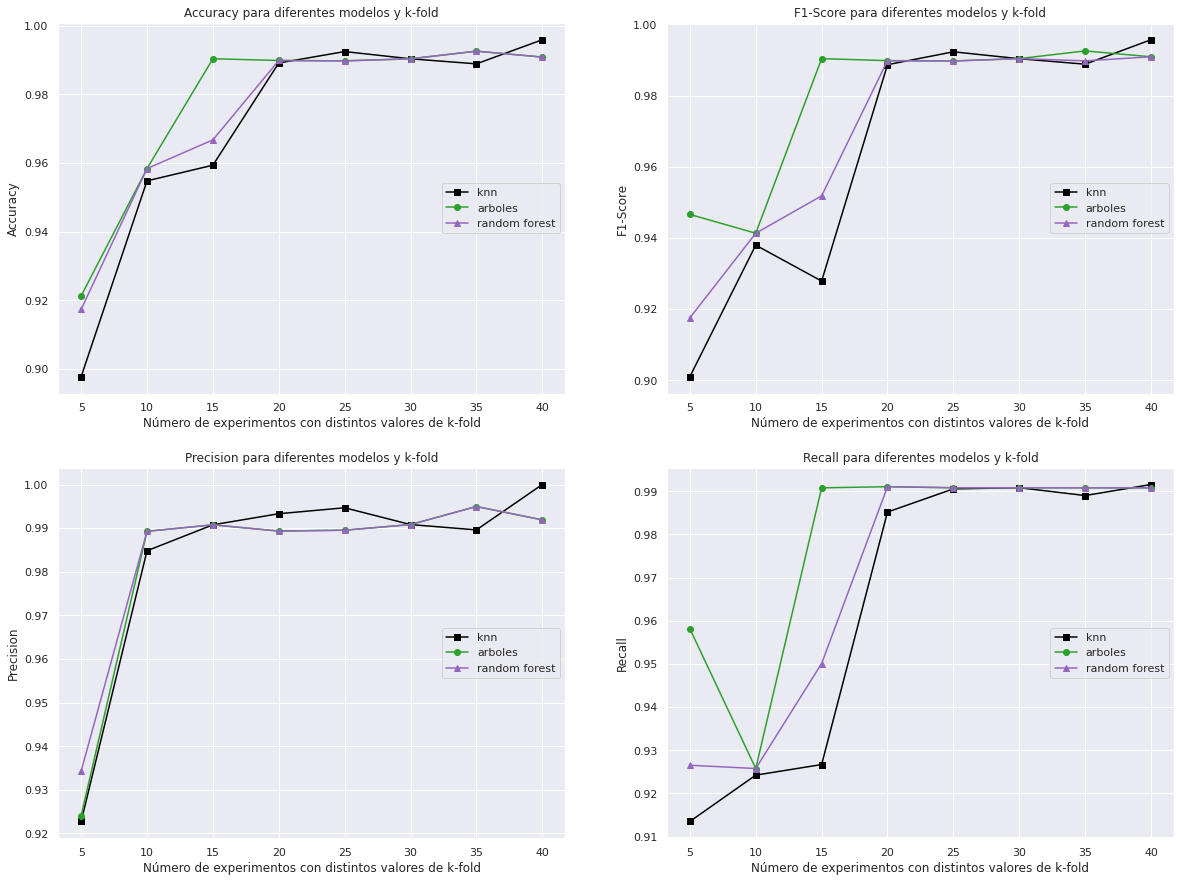

In [39]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

promedio_1_acc = []
promedio_2_acc = []
promedio_3_acc = []

promedio_1_prec = []
promedio_2_prec = []
promedio_3_prec = []

promedio_1_f1 = []
promedio_2_f1 = []
promedio_3_f1 = []

promedio_1_recall = []
promedio_2_recall = []
promedio_3_recall = []

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize = (20,15))
for fold in range(5, 41, 5):
  knn = KNeighborsClassifier(k_optimo)
  arboles = DecisionTreeClassifier(criterion = 'gini')
  randomForest = RandomForestClassifier(criterion = 'entropy')
  knn_fold(fold)
  arboles_fold(fold)
  randomForest_fold(fold)

array_n = [5, 10, 15, 20, 25, 30, 35, 40]

ax[0, 0].plot(array_n, promedio_1_acc, marker = 's', color = 'black', label = 'knn')
ax[0, 0].plot(array_n, promedio_2_acc, marker = 'o', color = 'tab:green', label = 'arboles')
ax[0, 0].plot(array_n, promedio_3_acc, marker = '^', color = 'tab:purple', label = 'random forest')
ax[0, 0].legend(loc = 'center right')
ax[0, 0].set_xlabel('Número de experimentos con distintos valores de k-fold') 
ax[0, 0].set_ylabel('Accuracy') 
ax[0, 0].set_title('Accuracy para diferentes modelos y k-fold')

ax[1, 0].plot(array_n, promedio_1_prec, marker = 's', color = 'black', label = 'knn')
ax[1, 0].plot(array_n, promedio_2_prec, marker = 'o', color = 'tab:green', label = 'arboles')
ax[1, 0].plot(array_n, promedio_3_prec, marker = '^', color = 'tab:purple', label = 'random forest')
ax[1, 0].legend(loc = 'center right')
ax[1, 0].set_xlabel('Número de experimentos con distintos valores de k-fold') 
ax[1, 0].set_ylabel('Precision') 
ax[1, 0].set_title('Precision para diferentes modelos y k-fold')

ax[0, 1].plot(array_n, promedio_1_f1, marker = 's', color = 'black', label = 'knn')
ax[0, 1].plot(array_n, promedio_2_f1, marker = 'o', color = 'tab:green', label = 'arboles')
ax[0, 1].plot(array_n, promedio_3_f1, marker = '^', color = 'tab:purple', label = 'random forest')
ax[0, 1].legend(loc = 'center right')
ax[0, 1].set_xlabel('Número de experimentos con distintos valores de k-fold') 
ax[0, 1].set_ylabel('F1-Score') 
ax[0, 1].set_title('F1-Score para diferentes modelos y k-fold')

ax[1, 1].plot(array_n, promedio_1_recall, marker = 's', color = 'black', label = 'knn')
ax[1, 1].plot(array_n, promedio_2_recall, marker = 'o', color = 'tab:green', label = 'arboles')
ax[1, 1].plot(array_n, promedio_3_recall, marker = '^', color = 'tab:purple', label = 'random forest')
ax[1, 1].legend(loc = 'center right')
ax[1, 1].set_xlabel('Número de experimentos con distintos valores de k-fold') 
ax[1, 1].set_ylabel('Recall') 
ax[1, 1].set_title('Recall para diferentes modelos y k-fold')

plt.show()
